In [31]:
import pandas as pd
import numpy as np

In [32]:
df = pd.read_csv("D:\\ML-DataSets\\titanic_toy.csv")

In [33]:
df.head()

,Age,Fare,Family,Survived
0,22.0,7.2500,1,0
1,38.0,71.2833,1,1
2,26.0,7.9250,0,1
3,35.0,53.1000,1,1
4,35.0,8.0500,0,0


In [34]:
x = df.drop(columns=['Survived'])
y = df['Survived']

In [35]:
x

,Age,Fare,Family
0,22.0,7.2500,1
1,38.0,71.2833,1
2,26.0,7.9250,0
3,35.0,53.1000,1
4,35.0,8.0500,0
...,...,...,...
886,27.0,13.0000,0
887,19.0,30.0000,0
888,NaN,23.4500,3
889,26.0,NaN,0


In [36]:
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [37]:
from sklearn.model_selection import train_test_split

In [38]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

## Using Arbitary value imputation maualy using pandas

In [39]:
df.isnull().mean()


Age         0.198653
Fare        0.050505
Family      0.000000
Survived    0.000000
dtype: float64

In [40]:
x_train['age_99'] = x_train['Age'].fillna(99)
x_train['age_-1'] = x_train['Age'].fillna(-1)

x_train['fare_999'] = x_train['Fare'].fillna(999)
x_train['fare_-1'] = x_train['Fare'].fillna(-1)

In [41]:
print(f'Varience of the orignal Age : {x_train["Age"].var()}')
print(f'Varience of the age_99 : {x_train["age_99"].var()}')
print(f'Varience of the age_-1 : {x_train["age_-1"].var()}')
print(f'Varience of the fare_999 : {x_train["fare_999"].var()}')
print(f'Varience of the fare_-1 : {x_train["fare_-1"].var()}')

Varience of the orignal Age : 210.2517072477438
Varience of the age_99 : 932.9665366701436
Varience of the age_-1 : 315.99550362600644
Varience of the fare_999 : 47525.47059536007
Varience of the fare_-1 : 2675.2394049177087


In [42]:
import seaborn as sns
from matplotlib import pyplot as plt

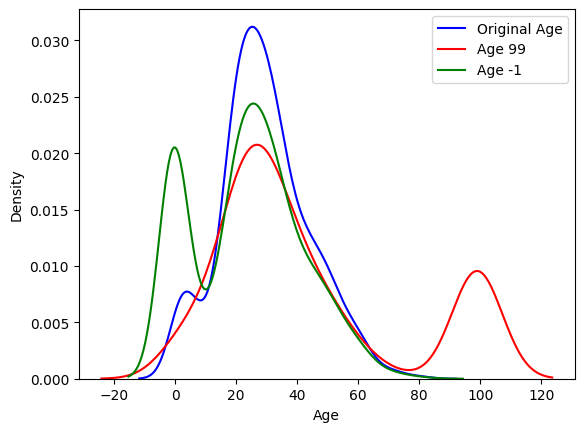

In [43]:
sns.kdeplot(x_train['Age'], color='blue', label='Original Age')
sns.kdeplot(x_train['age_99'], color='red', label='Age 99')
sns.kdeplot(x_train['age_-1'], color='green', label='Age -1')

plt.legend()
plt.show()

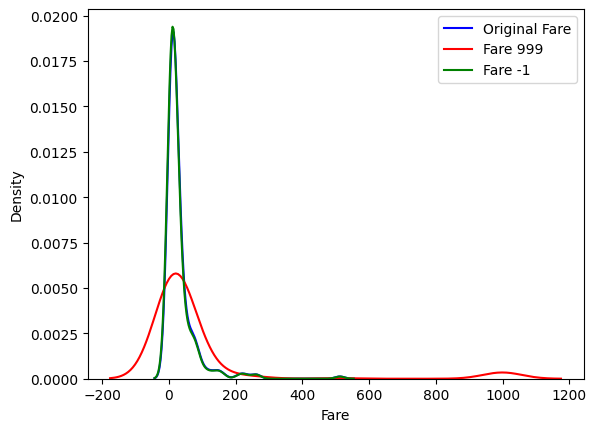

In [44]:
sns.kdeplot(x_train['Fare'], color='blue', label='Original Fare')
sns.kdeplot(x_train['fare_999'], color='red', label='Fare 999')
sns.kdeplot(x_train['fare_-1'], color='green', label='Fare -1')

plt.legend()
plt.show()

In [45]:
x_train.corr()

,Age,Fare,Family,age_99,age_-1,fare_999,fare_-1
Age,1.000000,0.091482,-0.319651,1.000000,1.000000,0.039967,0.085422
Fare,0.091482,1.000000,0.207193,-0.069365,0.145071,1.000000,1.000000
Family,-0.319651,0.207193,1.000000,-0.135079,-0.168329,0.046016,0.203212
age_99,1.000000,-0.069365,-0.135079,1.000000,-0.306576,-0.038303,-0.064017
age_-1,1.000000,0.145071,-0.168329,-0.306576,1.000000,0.067792,0.135159
fare_999,0.039967,1.000000,0.046016,-0.038303,0.067792,1.000000,0.094357
fare_-1,0.085422,1.000000,0.203212,-0.064017,0.135159,0.094357,1.000000


In [46]:
x_train.cov()

,Age,Fare,Family,age_99,age_-1,fare_999,fare_-1
Age,210.251707,75.481375,-6.993325,210.251707,210.251707,130.495777,69.137162
Fare,75.481375,2761.031435,18.599163,-111.965046,135.785804,2761.031435,2761.031435
Family,-6.993325,18.599163,2.830892,-6.941982,-5.034556,16.878492,17.684447
age_99,210.251707,-111.965046,-6.941982,932.966537,-166.460682,-255.051165,-101.137070
age_-1,210.251707,135.785804,-5.034556,-166.460682,315.995504,262.712284,124.270305
fare_999,130.495777,2761.031435,16.878492,-255.051165,262.712284,47525.470595,1063.944817
fare_-1,69.137162,2761.031435,17.684447,-101.137070,124.270305,1063.944817,2675.239405


## Using Sklearn 

In [47]:
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

In [48]:
impute1 = SimpleImputer(strategy='constant', fill_value=99)
impute2 = SimpleImputer(strategy='constant', fill_value = 999)

In [49]:
trf = ColumnTransformer([
    ('imputer1', impute1, ['Age']),
    ('imputer2', impute2, ['Fare'])
], remainder = 'passthrough')

In [54]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [55]:
trf.fit(x_train)

c:\Users\ANKAN KUMAR SAHOO\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\compose\_column_transformer.py:1667: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


ColumnTransformer(remainder='passthrough',
                  transformers=[('imputer1',
                                 SimpleImputer(fill_value=99,
                                               strategy='constant'),
                                 ['Age']),
                                ('imputer2',
                                 SimpleImputer(fill_value=999,
                                               strategy='constant'),
                                 ['Fare'])])

In [56]:
trf.named_transformers_['imputer1'].statistics_

array([99.])

In [57]:
trf.named_transformers_['imputer2'].statistics_

array([999.])

In [58]:
x_train = trf.transform(x_train)
x_test = trf.transform(x_test)

In [59]:
x_train

array([[ 45.5   ,  28.5   ,   0.    ],
       [ 23.    ,  13.    ,   0.    ],
       [ 32.    ,   7.925 ,   0.    ],
       ...,
       [ 41.    , 999.    ,   2.    ],
       [ 14.    , 120.    ,   3.    ],
       [ 21.    ,  77.2875,   1.    ]])

In [60]:
x_test

array([[9.900000e+01, 1.524580e+01, 2.000000e+00],
       [3.100000e+01, 1.050000e+01, 0.000000e+00],
       [2.000000e+01, 7.925000e+00, 0.000000e+00],
       [6.000000e+00, 3.300000e+01, 1.000000e+00],
       [1.400000e+01, 1.124170e+01, 1.000000e+00],
       [2.600000e+01, 7.885000e+01, 0.000000e+00],
       [9.900000e+01, 7.750000e+00, 0.000000e+00],
       [1.600000e+01, 1.800000e+01, 2.000000e+00],
       [1.600000e+01, 7.750000e+00, 0.000000e+00],
       [1.900000e+01, 2.628330e+01, 2.000000e+00],
       [3.700000e+01, 5.310000e+01, 1.000000e+00],
       [4.400000e+01, 8.050000e+00, 0.000000e+00],
       [9.900000e+01, 2.546670e+01, 4.000000e+00],
       [3.000000e+01, 7.225000e+00, 0.000000e+00],
       [3.600000e+01, 1.300000e+01, 0.000000e+00],
       [1.600000e+01, 3.940000e+01, 1.000000e+00],
       [4.200000e+01, 5.255420e+01, 1.000000e+00],
       [9.900000e+01, 7.829200e+00, 0.000000e+00],
       [2.700000e+01, 1.300000e+01, 0.000000e+00],
       [4.700000e+01, 5.200000e